# Non-polynomial curve fitting
## Finishing Activity 4

In Activity 4 (at least as far as we covered in class) we learned about a few key things:
- Fitting data with different models and how parameters play a role in the model fit.
- Python functions
- How to calculate the RMS error from data and a model

We begin where we left off aon the activity.

0.8370996316710002
0.8370996316710002


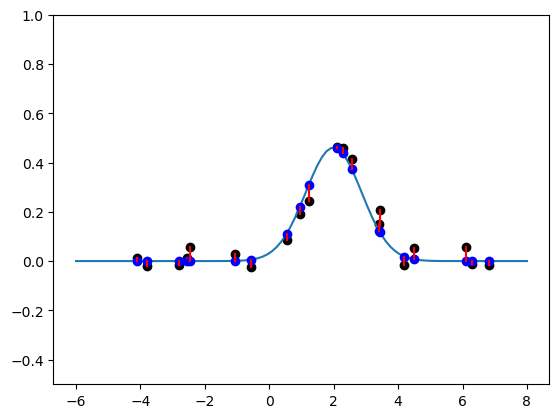

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

M = np.genfromtxt('fitdata.csv', delimiter=',') # Read in data from csv file
X = M[:,0] # get x values from data
Y = M[:,1] # get y values from data

## Define the model
mu = 2.0
sigma2 = .75
y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))


## Setup the plots
fig, ax = plt.subplots() # setup plots
ax.plot(X, Y, 'ko') # Plot the data
ax.set_ylim([-0.5, 1]) # Change the ylimit to match the data well


xs = np.linspace(-6,8,100) # The x values for plotting
ax.plot(xs, y(xs)) # Plot the model 'y'

# Plot the error bars
for index, xdata in enumerate(X): # `xdata' will be the value in the `X' array. `index' will be the index of that x value.

    ydata = Y[index] # Get the y value for the matching x value from the data

    ax.plot( xdata, y(xdata), 'bo') # This plots the model's prediction of the y value at that x value.
    ax.plot( np.array([xdata, xdata]), np.array([ydata, y(xdata)]), 'r') # creates a red line between the true
                                          # value and the model's prediction. This is the error.
        

## Define the "sumSquaredError" function.
def sumSquaredError(mu, sigma2):
    y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2)) # Define the model from a mu and sigma2
    error = sum(np.abs(y(X) - Y)**2) # Calculate the error using a built-in sum command
    return error # Return the calculated error

## Print the sumSquaredError for mu = 0, sigma2 = 1
print(sumSquaredError(0, 1))

## Define an adapter function so that we can minimize the error using scipy.optimize.fmin
adapter = lambda p: sumSquaredError(p[0], p[1])
# Check that it gives the same answer for mu = 0, sigma2 = 1
print(adapter(np.array([0, 1])))

Now that we have the image for $\mu = 2$ and $\sigma^2 = 0.75$, and we have the adapter function defined, we can find the argmin of the error function, giving the optimal $\mu$ and $\sigma^2$. 

In [2]:
# Find the argmin of the function "adapter" and save the optimal mu and sigma2 to the variables
# mu_optimal and sigma2_optimal respectively.
v = scipy.optimize.fmin(adapter, np.array([2.0, 0.75]))
print(v)
mu_optimal = v[0]
sigma2_optimal = v[1]

Optimization terminated successfully.
         Current function value: 0.016336
         Iterations: 28
         Function evaluations: 51
[2.17932179 0.76431937]


Plot the result of the optimal model.

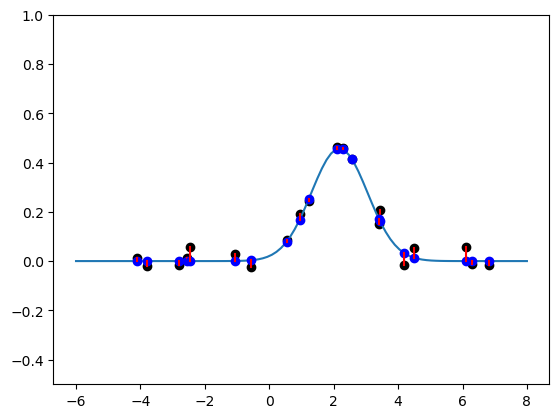

In [3]:
fig2, ax2 = plt.subplots() # setup plots
ax2.plot(X, Y, 'ko') # Plot the data
ax2.set_ylim([-0.5, 1]) # Change the ylimit to match the data well

mu = mu_optimal
sigma2 = sigma2_optimal

y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))

xs = np.linspace(-6,8,100) # The x values for plotting
ax2.plot(xs, y(xs)) # Plot the model 'y'

for index, xdata in enumerate(X): # `xdata' will be the value in the `X' array. `index' will be the index of that x value.

    ydata = Y[index] # Get the y value for the matching x value from the data

    ax2.plot( xdata, y(xdata), 'bo') # This plots the model's prediction of the y value at that x value.
    ax2.plot( np.array([xdata, xdata]), np.array([ydata, y(xdata)]), 'r') # creates a red line between the true
                                          # value and the model's prediction. This is the error.

# Average error
The error function we've used above is not the only error function one could use. I talked before about different error functions. Next we will consider the *average error* or $L^1$ error (technically speaking). 

$$\varepsilon_1 = \sum \limits_{k=1}^N | y(x_k) - y_k |.$$

For example, if the data is given by the following table:

 | x$_k$ | y$_k$ |
 | :---    | :---   |
 | -2    | 7     |
 | 1     |   -10 |
 | 3     |    3  |
 | 4     |    4  |
 
the error would be
$$\varepsilon_1 = |y(-2) - 7| + |y(1)+10| + |y(3) - 3| + |y(4) - 4|.$$

You should think about how you create the `averageError` function. It should take two inputs, `mu` and `sigma2`, just as the `sumSquaredError` function, except now you calculate the average error defined above. 

In [4]:
# Define the averageError function
def averageError(mu, sigma2):
    y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))
    error = sum(np.abs(y(X) - Y))
    return error

# Check it with mu = 0, sigma2 = 1
averageError(0, 1)

2.787291614425774

Now find the optimal `mu` and `sigma2`, except now these *optimal values* correspond to a *different optimization problem* because we have defined a different error. These parameters **minimize a different error.**

In [5]:
# Define an adapter function, adapter_avg
adapter_avg = lambda p: averageError(p[0], p[1])

# Find the argmin using fmin
v = scipy.optimize.fmin(adapter_avg, np.array([2.0, 0.75]))
print(v) # Print the optimal args

# Save the optimal values to mu_optimal_average and sigma2_optimal_average
mu_optimal_average = v[0]
sigma2_optimal_average = v[1]

Optimization terminated successfully.
         Current function value: 0.449770
         Iterations: 33
         Function evaluations: 62
[2.15021435 0.74340247]


Notice that the parameters that we found are pretty similar. Before plotting this, let's look at our last error function **Max error**.

# Max error

We now want to compute the *maximum error*:

$$\varepsilon_{\infty} = \max \limits_{1 \leq k \leq n} | y(x_k) - y_k |.$$

For example, if the data is given by the following table:

 | x$_k$ | y$_k$ |
 | :---    | :---   |
 | -2    | 7     |
 | 1     |   -10 |
 | 3     |    3  |
 | 4     |    4  |
 
the error would be
$$\varepsilon_{\infty} = \max\{ |y(-2) - 7|, |y(1)+10|, |y(3) - 3|, |y(4) - 4|\}.$$

Below you will create a new function called `maxError` that takes the same two inputs as before, `mu` and `sigma2`, except this one computes the max error, defined above. You should use the function `np.amax` which returns the maximal value of an array. 

In [6]:
# Define the maxError function
def maxError(mu, sigma2):
    y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))
    error = np.amax(np.abs(y(X) - Y))
    return error

# Check what maxError(0,1) gives
maxError(0, 1)

0.4278635705038101

Again we want to find the minimum, so create a new adapter function and find the optimal `mu` and `sigma2`. 

In [7]:
adapter_max = lambda p: maxError(p[0], p[1])
v_max = scipy.optimize.fmin(adapter_max, np.array([2.0, 0.75]))
mu_optimal_max = v_max[0];
sigma2_optimal_max = v_max[1];
print(v_max)

Optimization terminated successfully.
         Current function value: 0.058591
         Iterations: 58
         Function evaluations: 117
[2.11757249 0.97328203]


# Plotting all of them
Let's now plot all of the models we have.

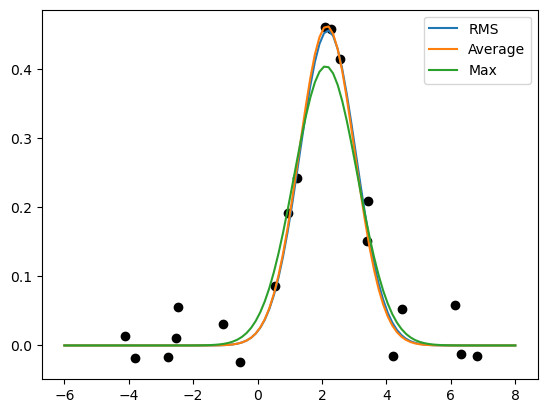

In [8]:
# Define a new anonymous function `y_model` that takes in x, mu, and sigma2.
y_model = lambda x, mu, sigma2: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))

# Now from that we can calculate the three models easily. 
# I have defined y_RMS below. You do the same for y_avg and y_max
y_RMS = lambda x: y_model(x, mu_optimal, sigma2_optimal)
y_avg = lambda x: y_model(x, mu_optimal_average, sigma2_optimal_average)
y_max = lambda x: y_model(x, mu_optimal_max, sigma2_optimal_max)

# Create a new figure and plot the data as well as the three models
fig3, ax3 = plt.subplots()
ax3.plot(X, Y, 'ko')
ax3.plot(xs, y_RMS(xs), label='RMS')
ax3.plot(xs, y_avg(xs), label='Average')
ax3.plot(xs, y_max(xs), label='Max')
ax3.legend()

Notice that all three of the models *are pretty similar*. In particular, the `RMS` and `average` models are extremely close. So, which is best? **There's not an obvious answer to that. Each of the models minimizes a different error** so each of them are best with respect to the error function used to create them. To figure out which model is the best, we would need to test and see what works the best for our particular application.

One thing we may care about that can help sway our opinion on which model is best is by looking at how each error function handles *outliers*. Here we will just say an outlier is a data point that does not visually line up with the data, it looks out of place. Let's load in some new data and visualize this.

# New data
We'll load in the new data with a visual outlier and plot the fit function with `mu = 2.0` and `sigma2 = 0.75`. 

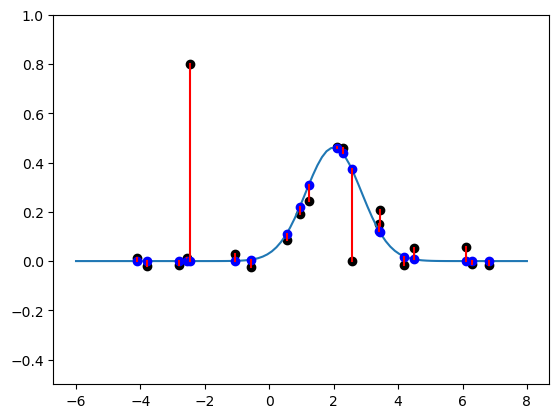

In [9]:
M = np.genfromtxt('fitdata2.csv', delimiter=',') # Read in data from csv file
X = M[:,0] # get x values from data
Y = M[:,1] # get y values from data

fig, ax = plt.subplots() # setup plots
ax.plot(X, Y, 'ko') # Plot the data
ax.set_ylim([-0.5, 1]) # Change the ylimit to match the data well

mu = 2.0
sigma2 = .75

y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))

xs = np.linspace(-6,8,100) # The x values for plotting
ax.plot(xs, y(xs)) # Plot the model 'y'

for index, xdata in enumerate(X): # `xdata' will be the value in the `X' array. `index' will be the index of that x value.

    ydata = Y[index] # Get the y value for the matching x value from the data

    ax.plot( xdata, y(xdata), 'bo') # This plots the model's prediction of the y value at that x value.
    ax.plot( np.array([xdata, xdata]), np.array([ydata, y(xdata)]), 'r') # creates a red line between the true
                                          # value and the model's prediction. This is the error.
        

We can see that we have moved two points. In particular, we chose two $x$ values and changed the corresponding $y$ value. What can this represent? It may come from:
- Measurement error (our machine that is recording data incorrectly measured the value at those locations),
- Different physical phenomena changing the behavior at that point (for instance, weird things happen near the freezing point of water!)
- Something else.

Let's see how this changes the result of our models. I'm going to copy and paste the error function definitions below because we have a new dataset. A smarter way to do this (to avoid copying and pasting) may be to have the data as inputs into our error functions. I'll leave you to think about that!

In [10]:
def sumSquaredError(mu, sigma2):
    y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))
    error = sum(np.abs(y(X) - Y)**2)
    return error

def averageError(mu, sigma2):
    y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))
    error = sum(np.abs(y(X) - Y))
    return error

def maxError(mu, sigma2):
    y = lambda x: 1/np.sqrt(2*np.pi*sigma2)*np.exp(-(x-mu)**2/(2*sigma2))
    error = np.amax(np.abs(y(X) - Y))
    return error

Now that the error functions are defined, define the adapter functions and calculate the optimal model for each error function with this data.

In [11]:
# Define the three adapter functions
adapter_RMS = lambda p: sumSquaredError(p[0], p[1])
adapter_avg = lambda p: averageError(p[0], p[1])
adapter_max = lambda p: maxError(p[0], p[1])

# Find the argmin for each
# First define the array "initial" which we will always use for the initial guess
initial = np.array([2.0, 0.75])

# Find the optimal parameters for RMS error
v = scipy.optimize.fmin(adapter_RMS, initial)
mu_optimal_squared = v[0]
sigma2_optimal_squared = v[1]

# Find the optimal parameters for avg error
v = scipy.optimize.fmin(adapter_avg, initial)
mu_optimal_avg = v[0]
sigma2_optimal_avg = v[1]

# Find the optimal parameters for avg error
v = scipy.optimize.fmin(adapter_max, initial)
mu_optimal_max = v[0]
sigma2_optimal_max = v[1]

Optimization terminated successfully.
         Current function value: 0.784658
         Iterations: 33
         Function evaluations: 65
Optimization terminated successfully.
         Current function value: 1.594593
         Iterations: 32
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.461432
         Iterations: 72
         Function evaluations: 142


### Plot the model with error bars for RMS error.

1.9811944762348679
1.187356412663002


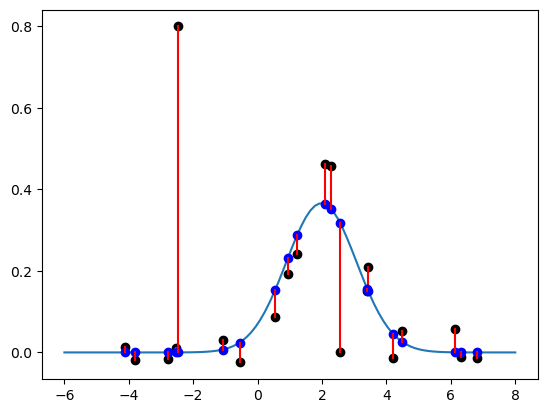

In [12]:
# Define y_RMS
print(mu_optimal_squared)
print(sigma2_optimal_squared)
y_RMS = lambda x: y_model(x, mu_optimal_squared, sigma2_optimal_squared)

fig, ax = plt.subplots()
ax.plot(X, Y, 'ko') # Plot the data
xs = np.linspace(-6,8,100) # The x values for plotting
ax.plot(xs, y_RMS(xs)) # Plot the model 'y'

for index, xdata in enumerate(X): # `xdata' will be the value in the `X' array. `index' will be the index of that x value.

    ydata = Y[index] # Get the y value for the matching x value from the data

    ax.plot( xdata, y_RMS(xdata), 'bo') # This plots the model's prediction of the y value at that x value.
    ax.plot( np.array([xdata, xdata]), np.array([ydata, y_RMS(xdata)]), 'r') # creates a red line between the true
                                          # value and the model's prediction. This is the error.

We see something very similar to what we saw before. The model has changed a little bit, but not very much. We can even see that with the old data we had $(\mu, \sigma^2) = (2.17932179 0.76431937)$ and now we have $(\mu, \sigma^2) = (1.98119448, 1.1873564)$. This means that the curve moved to the left and became flatter. 

Let's see what happens for the other error functions, starting with the average error.

2.122507256281096
0.745719721863134


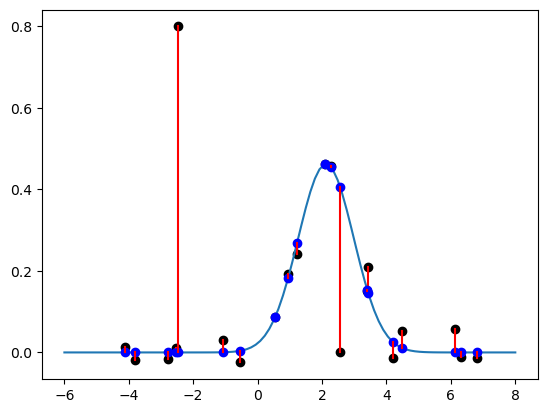

In [13]:
# Do the same with y_avg
print(mu_optimal_avg)
print(sigma2_optimal_avg)
y_avg = lambda x: y_model(x, mu_optimal_avg, sigma2_optimal_avg)

fig, ax = plt.subplots()
ax.plot(X, Y, 'ko') # Plot the data
xs = np.linspace(-6,8,100) # The x values for plotting
ax.plot(xs, y_avg(xs)) # Plot the model 'y'

for index, xdata in enumerate(X): # `xdata' will be the value in the `X' array. `index' will be the index of that x value.

    ydata = Y[index] # Get the y value for the matching x value from the data

    ax.plot( xdata, y_avg(xdata), 'bo') # This plots the model's prediction of the y value at that x value.
    ax.plot( np.array([xdata, xdata]), np.array([ydata, y_avg(xdata)]), 'r') # creates a red line between the true
                                          # value and the model's prediction. This is the error.

This one changed even less! Before we had $(\mu, \sigma^2) = (2.15021435, 0.74340247)$, now we have $(\mu, \sigma^2) = (2.122507, 0.7457197)$. There is basically no change. This is a big benefit of using average or $L^1$ error: **it is good at ignoring outliers**.

Let's see what happens to the last error function, `maxError`. 

-2.1700347604588615
1.292721530687251


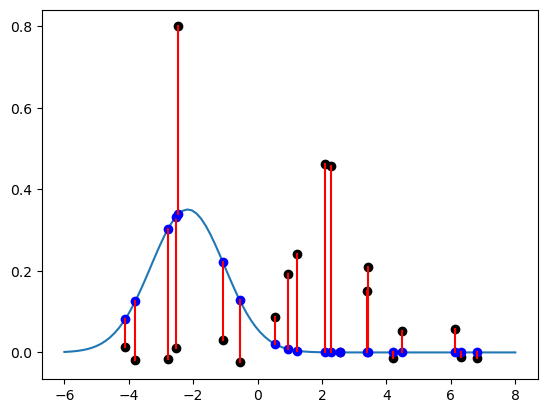

In [14]:
# Do the same with y_avg
print(mu_optimal_max)
print(sigma2_optimal_max)
y_max = lambda x: y_model(x, mu_optimal_max, sigma2_optimal_max)

fig, ax = plt.subplots()
ax.plot(X, Y, 'ko') # Plot the data
xs = np.linspace(-6,8,100) # The x values for plotting
ax.plot(xs, y_max(xs)) # Plot the model 'y'

for index, xdata in enumerate(X): # `xdata' will be the value in the `X' array. `index' will be the index of that x value.

    ydata = Y[index] # Get the y value for the matching x value from the data

    ax.plot( xdata, y_max(xdata), 'bo') # This plots the model's prediction of the y value at that x value.
    ax.plot( np.array([xdata, xdata]), np.array([ydata, y_max(xdata)]), 'r') # creates a red line between the true
                                          # value and the model's prediction. This is the error.

This one obviously changes quite a lot. Before we had $(\mu, \sigma^2) = (2.11757249, 0.97328203)$, now we have $(\mu, \sigma^2) = (-2.170035, 1.292715)$. That is a huge change. So, what happened? The maximum error was at the big outlier near $x=-2$. To minimize that error, the curve moved left. **The max error function is highly affected by outliers!**

## A comparison between the models.

Finally, let's do a comparison of the three different models by plotting them all together. 

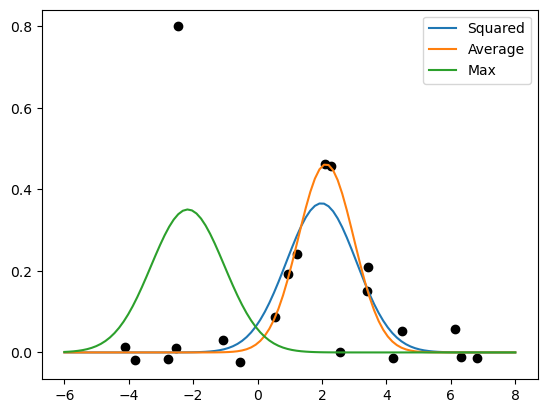

In [15]:
fig5, ax5 = plt.subplots()
ax5.plot(X, Y, 'ko')
ax5.plot(xs, y_RMS(xs), label='Squared')
ax5.plot(xs, y_avg(xs), label='Average')
ax5.plot(xs, y_max(xs), label='Max')
ax5.legend()

We see that in terms of outliers, the maxError was most effected, then the RMS error, then the average error, which largely ignored the outliers. This is a general trend. So, why would we use one model over another? It comes down to the application. Usually, we are happy to ignore outliers. Usually that means "bad data." But, there are times when we aren't very confident that we can ignore outliers. For instance, if human life is on the line, you don't want to assume that some data points are bad and can simply be ignored. In that case you might want to do max error because you want to cover the **worst case scenario**. In cases where you can safely ignore outliers because getting something wrong doesn't have very high consequence, you want to use the **average error.** If you are unsure, you use RMS, which is what people do in most cases. 